<a href="https://colab.research.google.com/github/hanarifdahs/Machine-Learning/blob/master/Classification_1301174685.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload Dataset yang telah di update agar mempersingkat pengerjaan

In [0]:
from google.colab import files
uploaded = files.upload()

Saving used_cars_updated.csv to used_cars_updated.csv


Read csv file with pandas dan cek missing value

In [0]:
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(uploaded['used_cars_updated.csv']))
data = data.drop(columns = ['Unnamed: 0','Unnamed: 0.1'])
data.isnull().sum()

id                16
region            16
price             16
year              28
manufacturer     716
model            281
fuel              89
odometer        2400
title_status     126
transmission     206
dtype: int64

Drop variabel yang tidak terlalu dibutuhkan, lalu bagi variabel ke dalam 2 list yaitu category untuk variabel yang tidak dapat dihitung dan number untuk varibel yang dapat dihitung. Setelah itu bersihkan data yang terdapat missing value.

In [0]:
categorical = ['id','region','manufacturer','model','fuel','title_status','transmission']
number = ['price','odometer','year']
for i in number:
  data[i] = data[i].fillna(data[i].mean())
for j in categorical:
  data[j] = data[j].fillna(data[j].mode().values[0])
data.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
dtype: int64



Cek outliers menggunakan boxplot untuk data price, odometer, dan year

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 15000x15000 with 0 Axes>

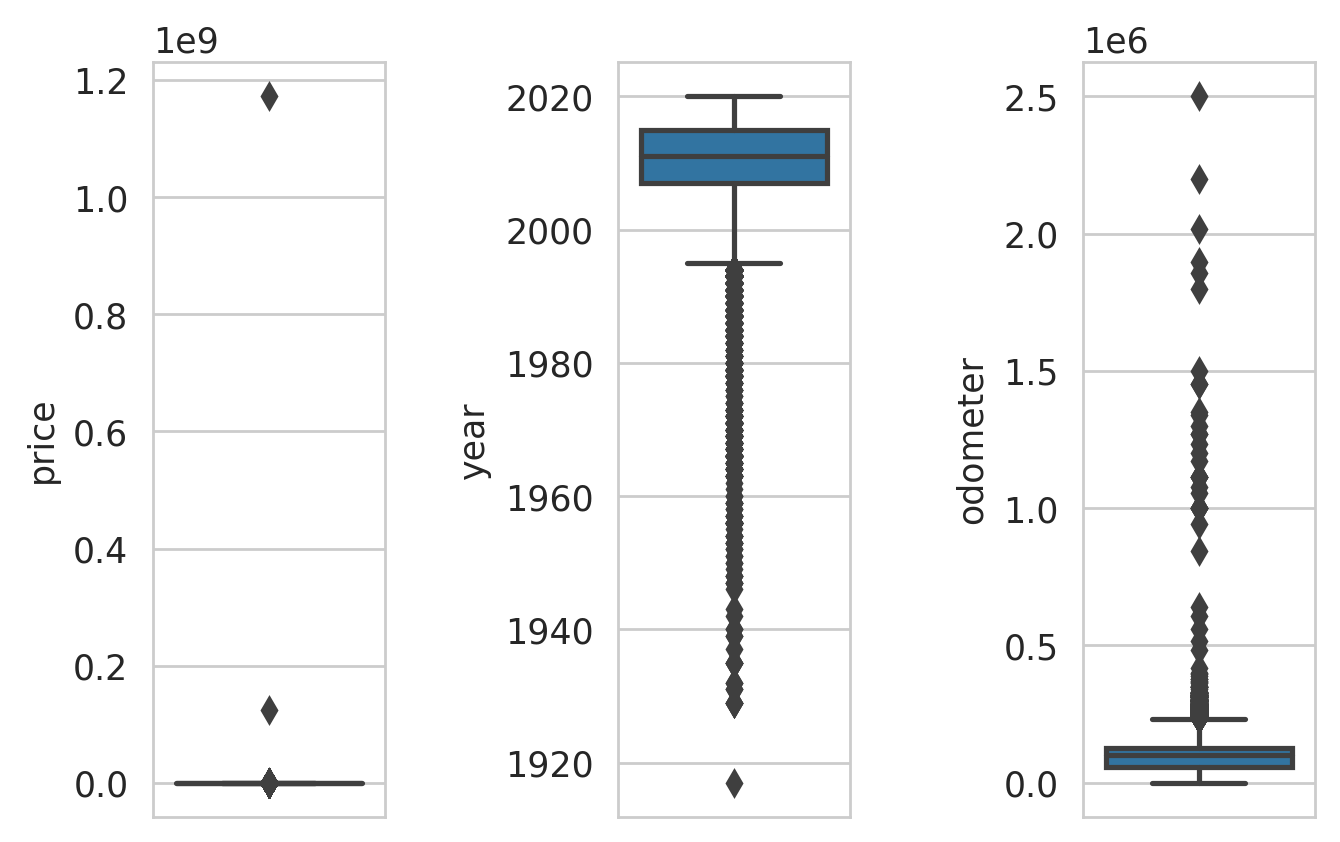

In [0]:
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 250
plt.figure(figsize=(60, 60))
f, axes = plt.subplots(1, 3)
sns.boxplot(y=data["price"], ax=axes[0])
sns.boxplot(y=data["year"], ax=axes[1])
sns.boxplot(y=data["odometer"], ax=axes[2])
plt.subplots_adjust(wspace=1)

Delete row berdasarkan outliers yg muncul

In [0]:
indexNames = data[ data['odometer'] > 500].index
data.drop(indexNames , inplace=True)

In [0]:
indexNames = data[ data['price'] >= 60000 ].index
data.drop(indexNames , inplace=True)

In [0]:
indexNames = data[ data['year'] < 1980 ].index
data.drop(indexNames , inplace=True)

<Figure size 15000x15000 with 0 Axes>

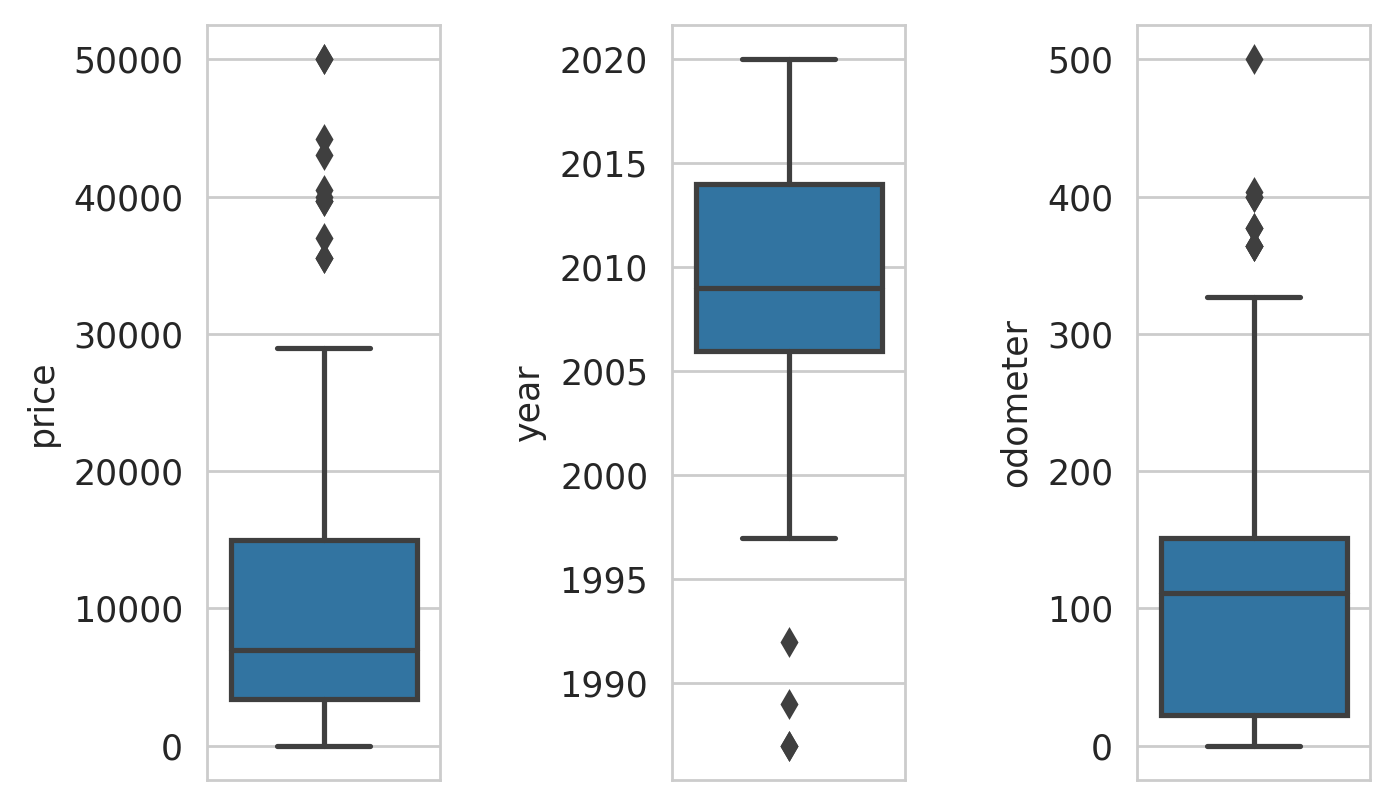

In [0]:
mpl.rcParams['figure.dpi'] = 250
plt.figure(figsize=(60, 60))
f, axes = plt.subplots(1, 3)
sns.boxplot(y=data["price"], ax=axes[0])
sns.boxplot(y=data["year"], ax=axes[1])
sns.boxplot(y=data["odometer"], ax=axes[2])
plt.subplots_adjust(wspace=1)

In [0]:
data.head(10)

,id,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission
1,7.034441e+09,salt lake city,0.0,2016.0,ford,f-150,gas,10.0,clean,automatic
3,7.034441e+09,salt lake city,0.0,2016.0,ford,f-150,gas,10.0,clean,automatic
44,7.033845e+09,salt lake city,0.0,2016.0,ford,f-350 super duty,diesel,10.0,clean,automatic
45,7.033845e+09,salt lake city,0.0,2016.0,ford,focus,gas,10.0,clean,automatic
56,7.033599e+09,salt lake city,33950.0,1935.0,ford,2dr sedan,gas,0.0,clean,automatic
106,7.033198e+09,salt lake city,0.0,2016.0,ford,f-150,gas,10.0,clean,automatic
108,7.033198e+09,salt lake city,0.0,2016.0,ford,f-150,gas,10.0,clean,automatic
173,7.048748e+09,st george,6000.0,1955.0,chrysler,windsor,gas,0.0,clean,automatic
348,7.041986e+09,st george,39666.0,2017.0,ford,FREIGHTLINER SPRINTER 3500,diesel,88.0,clean,automatic
427,7.039795e+09,st george,44200.0,2020.0,chevrolet,colorado crew cab 4x4 zr2,gas,22.0,clean,automatic


In [0]:
df = data.loc[:, ['id','region','manufacturer','model','fuel','title_status','transmission']]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform)
df.head(10)

,id,region,manufacturer,model,fuel,title_status,transmission
1,12,11,6,49,2,0,0
3,11,11,6,49,2,0,0
44,6,11,6,60,0,0,0
45,5,11,6,67,2,0,0
106,3,11,6,49,2,0,0
108,2,11,6,49,2,0,0
348,58,12,6,15,0,0,0
427,41,12,3,33,2,0,0
599,21,12,6,15,0,0,0
1064,181,13,18,129,2,0,0


In [0]:
#import scaling model
from sklearn.preprocessing import MinMaxScaler

#Create a scaler object
scaler = MinMaxScaler()

# Fit and transform the merged['Fare']
data['price'] = scaler.fit_transform(data['price'].values.reshape(-1,1))
data['price'].head()



1      0.0
3      0.0
44     0.0
45     0.0
106    0.0
Name: price, dtype: float64

In [0]:
data['odometer'] = scaler.fit_transform(data['odometer'].values.reshape(-1,1))
data['odometer'].head()

1      0.02
3      0.02
44     0.02
45     0.02
106    0.02
Name: odometer, dtype: float64

In [0]:
data.loc[:, ['id','region', 'manufacturer','model','fuel','title_status','transmission']] = data.loc[:, ['id','region', 'manufacturer','model','fuel','title_status','transmission']].astype('category')


In [0]:
data.dtypes

id              category
region          category
price            float64
year             float64
manufacturer    category
model           category
fuel            category
odometer         float64
title_status    category
transmission    category
dtype: object

In [0]:
data.drop(columns = ['title_status'], inplace = True, axis = 1)
data.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'fuel',
       'odometer', 'transmission'],
      dtype='object')

In [0]:
data = pd.get_dummies(data, drop_first=True)
data.head(16)

,price,year,odometer,id_7032887456.0,id_7033198406.0,id_7033198497.0,id_7033467284.0,id_7033844817.0,id_7033844851.0,id_7033938511.0,id_7034069217.0,id_7034118427.0,id_7034222206.0,id_7034440546.0,id_7034440610.0,id_7034476749.0,id_7034478729.0,id_7034479024.0,id_7034485470.0,id_7035094284.0,id_7035097582.0,id_7035101073.0,id_7035104505.0,id_7035408320.0,id_7035703284.0,id_7035852064.0,id_7037017666.0,id_7037370781.0,id_7037742776.0,id_7037744159.0,id_7038292023.0,id_7038453462.0,id_7038532916.0,id_7038650052.0,id_7039351307.0,id_7039392143.0,id_7039395564.0,id_7039399241.0,id_7039402620.0,id_7039502138.0,...,model_saab 9-3,model_saab 9-3 4dr sdn aero,model_santa fe gls awd,model_santa fe se,model_scion iq,model_sentra,model_sierra 1500,model_silverado,model_silverado 1500,model_silverado 1500 lt z71,model_silverado 2500hd,model_sorento,model_sorento ex,model_stateline rwd gas manual,model_suburban,model_suburban ltz,model_tahoe,model_taurus,model_titan xd crew cab s,model_trailblazer,model_tribute,model_tundra,model_tundra 4wd,model_tundra crewmax,model_van,model_versa s,model_wrangler unlimited,model_wrangler unlimited sport,model_wrangler unlimited tj,model_xc70 awd,model_xlt explorer,model_xterra,model_xterra off-road,model_yukon,model_zdx,fuel_electric,fuel_gas,fuel_hybrid,transmission_manual,transmission_other
1,0.00000,2016.0,0.020,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.00000,2016.0,0.020,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
44,0.00000,2016.0,0.020,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45,0.00000,2016.0,0.020,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
106,0.00000,2016.0,0.020,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
108,0.00000,2016.0,0.020,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
348,0.79332,2017.0,0.176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
427,0.88400,2020.0,0.044,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
599,0.79332,2017.0,0.176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1064,0.12590,2008.0,0.282,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [0]:
train = data.iloc[:2500, :]
test  = data.iloc[2500:, :]

In [0]:
train = train.drop(columns = ['year'], axis = 1)
test = test.drop(columns = ['price'], axis = 1)

In [0]:
# setting the data as input and output for machine learning models
X_train = train.drop(columns = ['price'], axis = 1) 
y_train = train['year']

# Extract test set
X_test  = test.drop("price", axis = 1).copy()

KeyError: ignored

In [0]:
#1.Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#2.KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#3.Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 40)

#4.Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 40, n_estimators = 100)

#5.Support Vector Machines
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')

#6. XGBoost 
from xgboost import XGBClassifier
xgb = XGBClassifier(n_job = -1, random_state = 40)

In [0]:
def train_accuracy(model):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracy = np.round(train_accuracy*100, 2)
    return train_accuracy
    
# making the summary table of train accuracy.
train_accuracy = pd.DataFrame({'Train_accuracy(%)':[train_accuracy(lr), train_accuracy(knn), train_accuracy(dt), train_accuracy(rf), train_accuracy(svc), train_accuracy(xgb)]})
train_accuracy.index = ['LR', 'KNN','DT', 'RF', 'SVC', 'XGB']
sorted_train_accuracy = train_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False)

#Training Accuracy of the Classifiers
sorted_train_accuracy

ValueError: ignored

In [0]:
def val_score(model):
    from sklearn.model_selection import cross_val_score
    val_score = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    val_score = np.round(val_score*100, 2)
    return val_score

# making the summary table of cross validation accuracy.
val_score = pd.DataFrame({'val_score(%)':[val_score(lr), val_score(knn), val_score(dt), val_score(rf), val_score(svc), val_score(xgb)]})
val_score.index = ['LR', 'KNN','DT', 'RF', 'SVC', 'XGB']
sorted_val_score = val_score.sort_values(by = 'val_score(%)', ascending = False)

#cross validation accuracy of the Classifiers
sorted_val_score

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition f

NameError: ignored